In [2]:
# Importo librerías
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from wordcloud import WordCloud
import seaborn as sns

In [3]:
# Cargar el dataset
file_path = 'OSHA.csv'
df = pd.read_csv(file_path)
df.head()

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction End Use,build_stor,Building Stories,proj_cost,...,Event type,evn_factor,Environmental Factor,hum_factor,Human Factor,task_assigned,Task Assigned,hazsub,fat_cause,fall_ht
0,220982664,8/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0


In [4]:
# Mostrar los nombres de las columnas del DataFrame
column_names = df.columns
print(column_names)

Index(['summary_nr', 'Event Date', 'Abstract Text', 'Event Description',
       'Event Keywords', 'con_end', 'Construction End Use', 'build_stor',
       'Building Stories', 'proj_cost', 'Project Cost', 'proj_type',
       'Project Type', 'Degree of Injury', 'nature_of_inj', 'Nature of Injury',
       'part_of_body', 'Part of Body', 'event_type', 'Event type',
       'evn_factor', 'Environmental Factor', 'hum_factor', 'Human Factor',
       'task_assigned', 'Task Assigned', 'hazsub', 'fat_cause', 'fall_ht'],
      dtype='object')


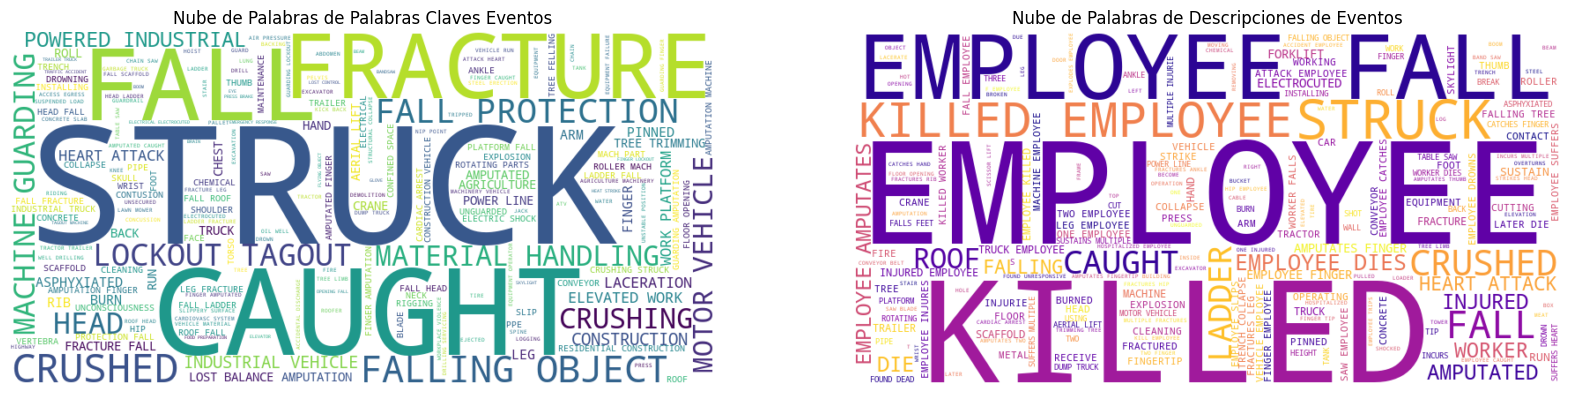

In [6]:
#Quiero ver las palabras que mas se repiten en las Palabras Claves del Evento y Descripcion del Evento
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combinar todo el texto de la columna 'Event Keywords' en una sola cadena
text1 = " ".join(description for description in df['Event Keywords'].dropna())

# Generar la primera nube de palabras
wordcloud1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis', 
                       max_words=200, contour_width=3, contour_color='steelblue').generate(text1)

# Generar la segunda nube de palabras 
text2 = " ".join(description for description in df['Event Description'].dropna())
wordcloud2 = WordCloud(width=800, height=400, background_color='white', colormap='plasma', 
                       max_words=200, contour_width=3, contour_color='black').generate(text2)

# Crear la figura con dos subgráficos
plt.figure(figsize=(20, 20))

# Primer subgráfico
plt.subplot(1, 2, 1)  
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Palabras Claves Eventos')

# Segundo subgráfico
plt.subplot(1, 2, 2)  
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Descripciones de Eventos')

# Mostrar los gráficos
plt.show()

#No sabia si contaba como grafico pero me gusto hacerlo por eso lo deje

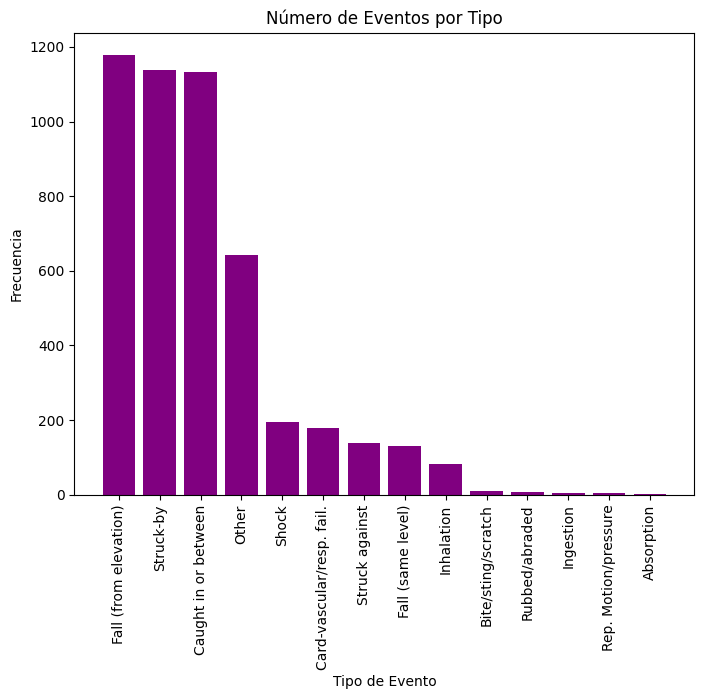

In [7]:
#Creacion de Barras Verticales
# Contar la frecuencia de cada tipo de evento
event_counts = df['Event type'].value_counts()

# Crear el gráfico de barras verticales
plt.figure(figsize=(8, 6))
plt.bar(event_counts.index, event_counts.values, color='purple')
plt.title('Número de Eventos por Tipo')
plt.xlabel('Tipo de Evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


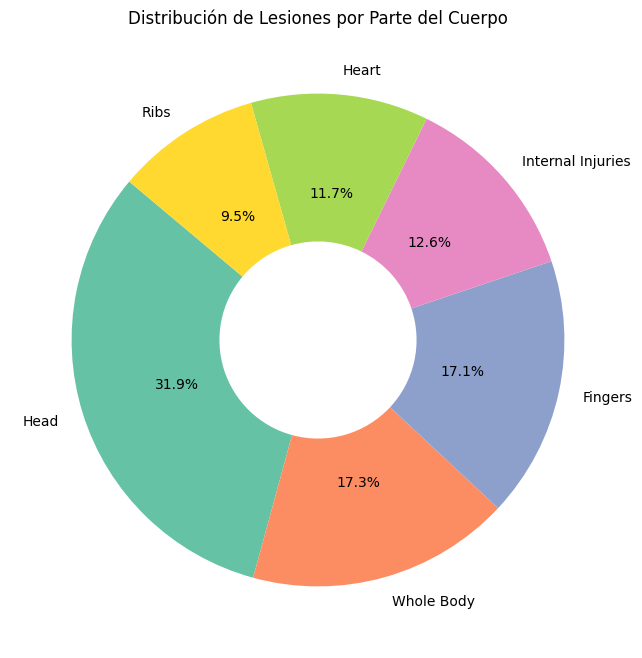

In [8]:
# Contar la frecuencia de cada parte del cuerpo 
part_counts = df['Part of Body'].value_counts().nlargest(6) #Elegi los 6 primeros

# Crear el gráfico de anillo
plt.figure(figsize=(10, 8))
plt.pie(part_counts, labels=part_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Set2').colors, wedgeprops=dict(width=0.6))
plt.title('Distribución de Lesiones por Parte del Cuerpo')
plt.show()

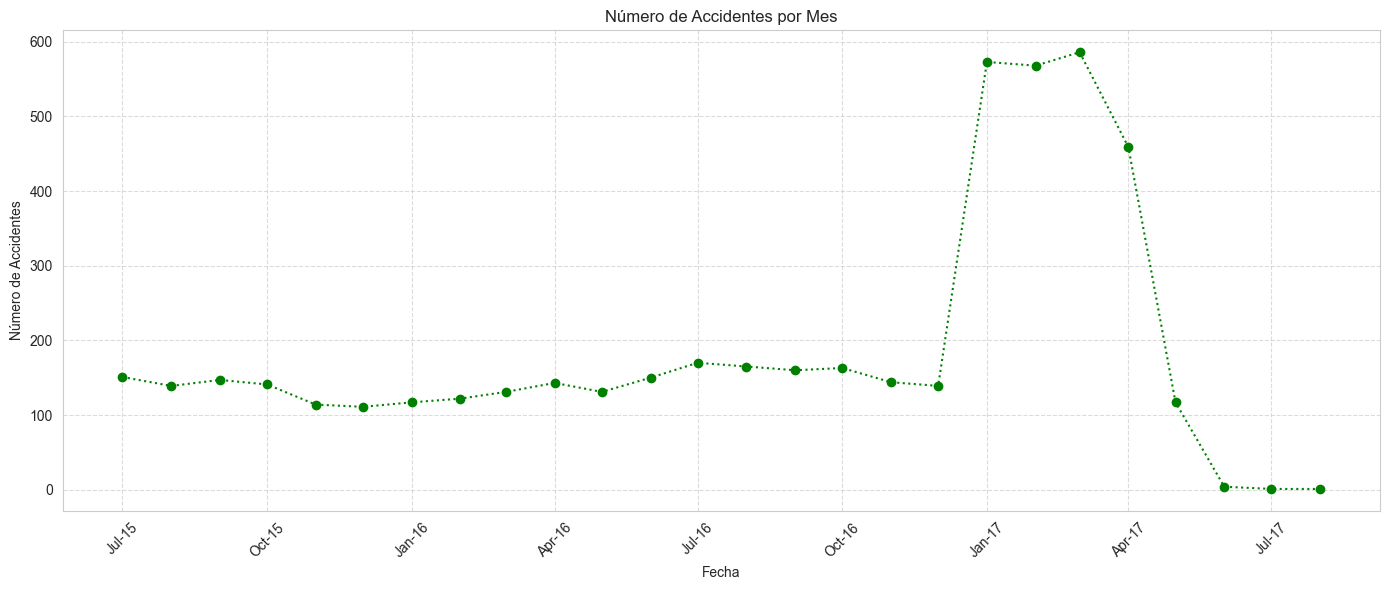

In [20]:
 #Analizar los accidentes por mes y por año 
import matplotlib.dates as mdates

# Convertir la columna 'Event Date' a tipo datetime
df['Event Date'] = pd.to_datetime(df['Event Date'], errors='coerce')

# Extraer el año y el mes de la fecha del evento
df['YearMonth'] = df['Event Date'].dt.to_period('M')

# Contar la cantidad de eventos por año y mes
events_by_month = df['YearMonth'].value_counts().sort_index()

# Convertir el índice a formato datetime para el gráfico
events_by_month.index = events_by_month.index.to_timestamp()

# Crear el gráfico lineal para mostrar los accidentes por mes
plt.figure(figsize=(14, 6))
plt.plot(events_by_month.index, events_by_month.values, marker='o', linestyle=':', color='g')
plt.title('Número de Accidentes por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Accidentes')

# Configurar el formato del eje x para mostrar "Mes-Año"
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta el diseño para evitar el recorte de etiquetas
plt.show()

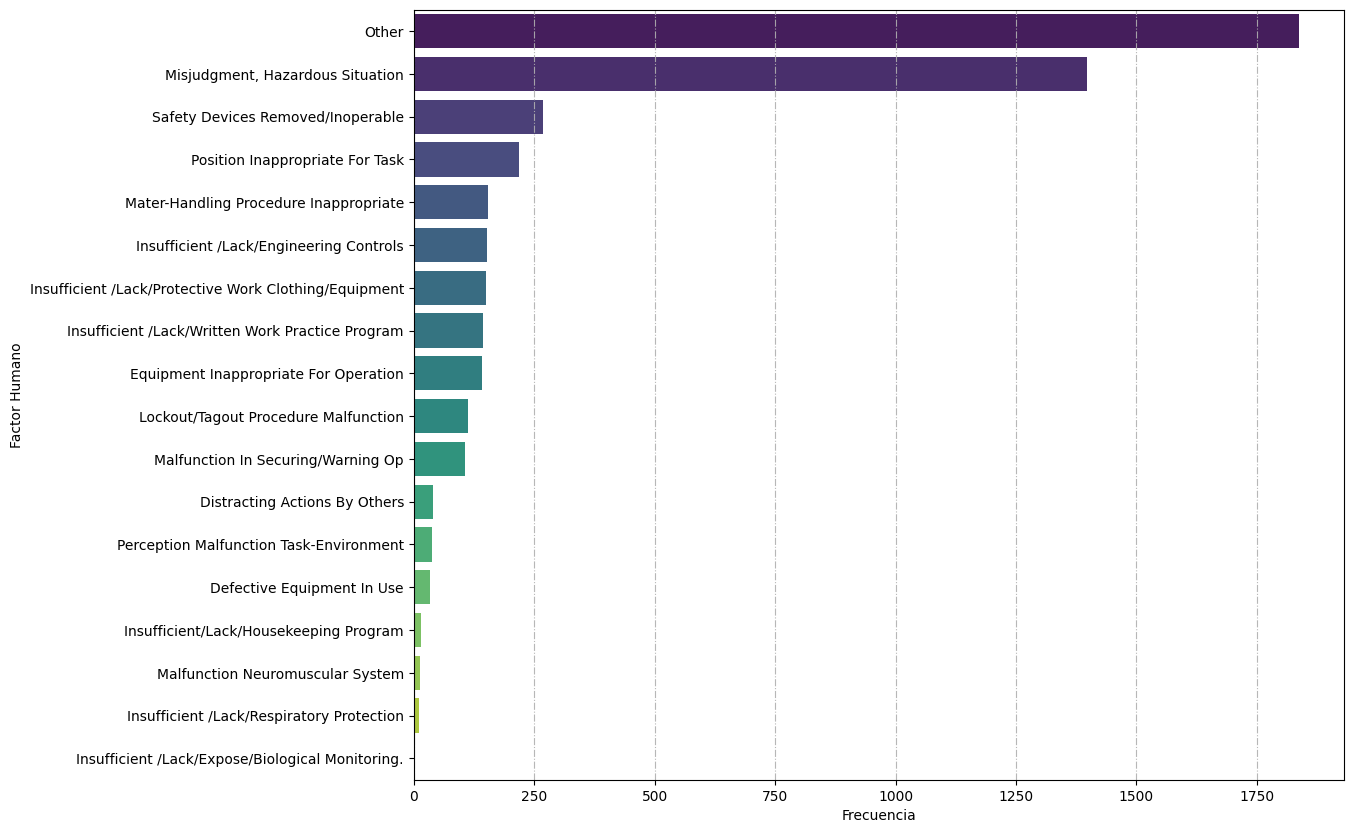

In [14]:
# Grafico de Barras Horizontales para determinar la frecuencia de factor humano asocido al accidete
# Contar la frecuencia de cada factor 
part_counts = df['Human Factor'].value_counts()

# Convertir los datos a un DataFrame para seaborn
part_df = part_counts.reset_index()
part_df.columns = ['Human Factor', 'Frecuencia']

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 10))
sns.barplot(x='Frecuencia', y='Human Factor', data=part_df, hue='Human Factor', palette='viridis', legend=False)
plt.xlabel('Frecuencia')
plt.ylabel('Factor Humano')
plt.grid(axis='x', linestyle='-.', alpha=0.9)
plt.show()


In [14]:
unique_values = df['Degree of Injury'].unique()
print(unique_values)

['Nonfatal' 'Fatal']


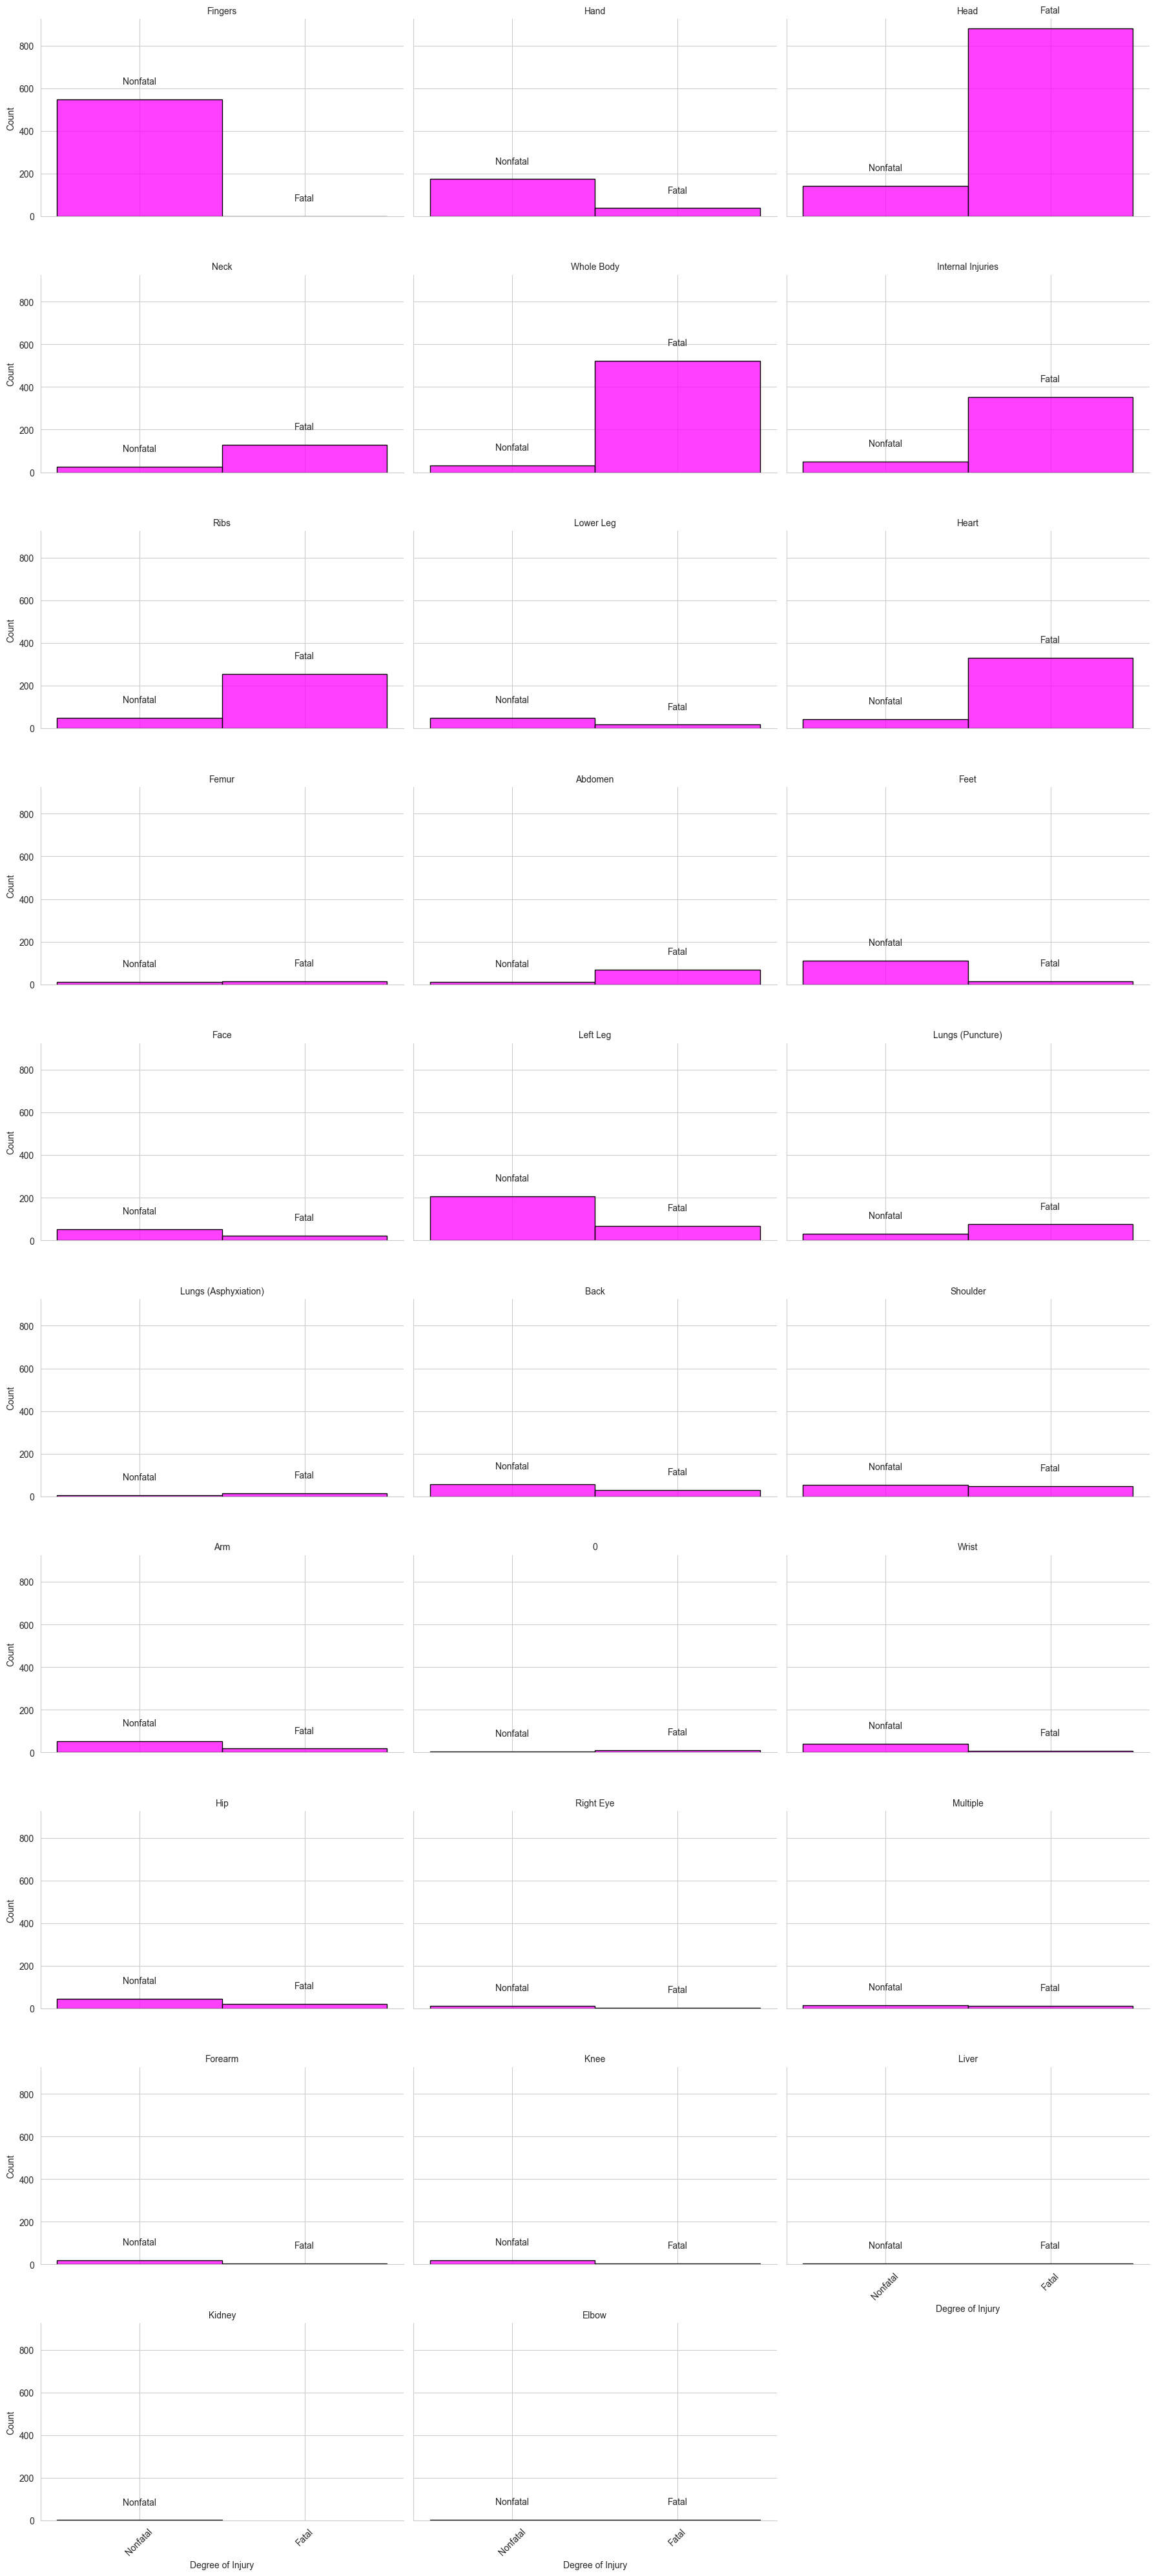

In [22]:
#Grafico para comparar la relacion entre las partes del cuerpo y el grado de lesion (Fatal o no)
# Configurar el estilo de Seaborn
sns.set_style('whitegrid')

# Crear el FacetGrid con ajustes mejorados
g = sns.FacetGrid(df, 
                  col='Part of Body', 
                  col_wrap=3,       # Número de gráficos por fila
                  height=4,         # Altura de cada gráfico
                  aspect=1.5)       # Relación de aspecto de cada gráfico

# Mapear el histograma en cada faceta
g.map(sns.histplot, 
      'Degree of Injury', 
      bins=1,               # Número de bins en el histograma
      color='magenta',       # Color de las barras
      edgecolor='black')     # Color del borde de las barras

# Obtener los valores únicos de 'Degree of Injury'
unique_injuries = df['Degree of Injury'].unique()

# Añadir etiquetas sobre las barras
for ax in g.axes.flat:
    for p in ax.patches:
        # Obtener el índice de la barra para encontrar el valor correspondiente en unique_injuries
        idx = int(p.get_x() + p.get_width() / 2)
        
        # Asegurarse de que el índice esté dentro del rango de valores únicos
        if idx < len(unique_injuries):
            injury_label = unique_injuries[idx]
        else:
            injury_label = "Unknown"
        
        ax.annotate(f'{injury_label}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 20), 
                    textcoords='offset points')


# Ajustar los títulos de cada faceta
g.set_titles(col_template="{col_name}", fontsize=14)

# Etiquetas de los ejes
g.set_axis_labels("Degree of Injury", "Count")

# Rotar las etiquetas del eje x si es necesario
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Ajustar espacios entre gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()



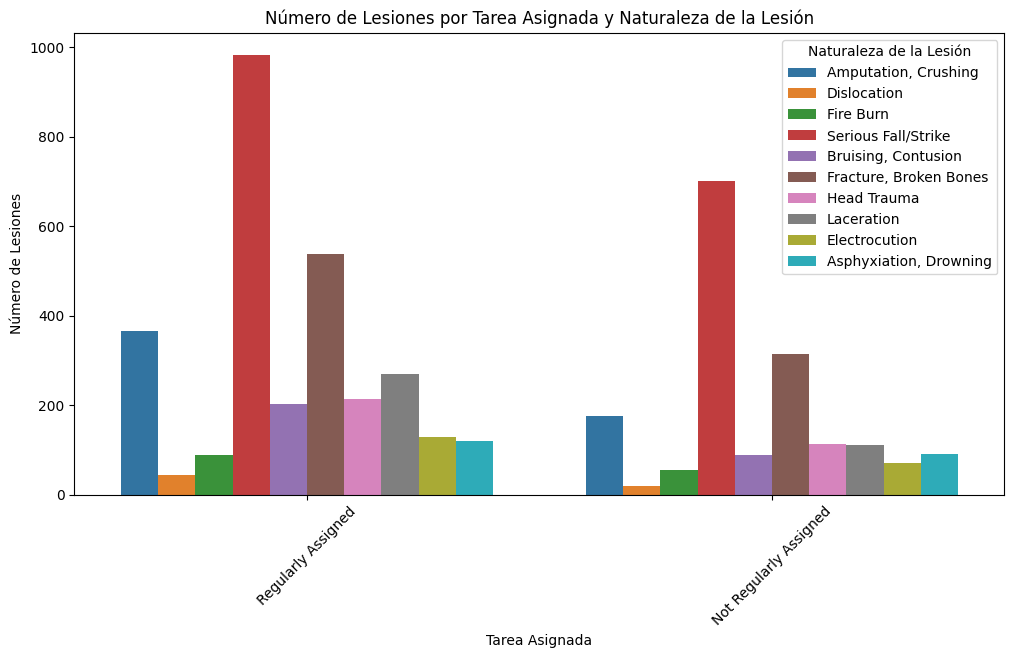

In [15]:
# Gráfico de Barras Apiladas entre 
# Contar el número de sucesos para cada categoría de Nature of Injury
conteos = df['Nature of Injury'].value_counts()

# Seleccionar las 10 categorías con mayor cantidad de sucesos
top_10_nature_of_injury = conteos.head(10)

# Filtrar el DataFrame para incluir solo las 10 principales categorías
df_top_10 = df[df['Nature of Injury'].isin(top_10_nature_of_injury.index)]

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.countplot(x='Task Assigned', hue='Nature of Injury', data=df_top_10, order=df_top_10['Task Assigned'].value_counts().index)

# Añadir título y etiquetas
plt.title('Número de Lesiones por Tarea Asignada y Naturaleza de la Lesión')
plt.xlabel('Tarea Asignada')
plt.ylabel('Número de Lesiones')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.legend(title='Naturaleza de la Lesión')
plt.show()